# Exploration des résultats des 302

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

In [2]:
db = "recopytex.db"
conn = sqlite3.connect(db)
c = conn.cursor()

In [3]:
tribe_name = "302"

Id de la classe de 302

In [4]:
tribe_id = c.execute("SELECT id from tribe WHERE tribe.name ==  ?", (tribe_name,)).fetchone()[0]

In [5]:
print(tribe_id)

1


Evaluations disponibles

In [6]:
evals = c.execute("SELECT id, name from eval WHERE eval.tribe_id == ?", (tribe_id,))

In [7]:
evals.fetchmany()

[(1, 'DS1 mise en jambe')]

## DS 1 mise en jambre

In [8]:
eval_id = 1

In [9]:
questions_scores = pd.read_sql_query("SELECT student.name, student.surname, score.value, question.competence\
                FROM score\
                JOIN question ON score.question_id==question.id \
                JOIN exercise ON question.exercise_id==exercise.id \
                JOIN eval ON exercise.eval_id==eval.id \
                JOIN student ON score.student_id==student.id\
                WHERE eval.id == (?)",
                 conn,
                params = (eval_id,))

In [10]:
questions_scores = questions_scores[questions_scores["value"]!='']

In [11]:
def note2score(x):
    if x["value"] == '.':
        return 0
    if x["value"] not in [0, 1, 2, 3]:
        raise ValueError(f"The evaluation is out of range: {x['value']} at {x}")
    return x["value"]

In [12]:
questions_scores["score"] = questions_scores.apply(note2score, axis=1)

In [13]:
questions_scores.head()

name    surname value competence  score
0  ABDALLAH ALLAOUI  Taiassima     1       Cher      1
1  ABDALLAH ALLAOUI  Taiassima     2        Cal      2
2  ABDALLAH ALLAOUI  Taiassima     .        Cal      0
3             ADANI      Ismou     2       Cher      2
4             ADANI      Ismou     2        Cal      2

In [14]:
questions_scores["fullname"] = questions_scores["name"] + " " + questions_scores["surname"]

In [15]:
def score_mean(x):
    mean = np.mean(x)
    return round(mean, 0)

score_mean.__name__ = "Moyenne discrète"

In [16]:
report_comp = pd.pivot_table(questions_scores,
              index=["fullname"],
              columns = ['competence'],
              values = ["score"],
              aggfunc = [score_mean])

Applatissement du nom des colonnes

In [17]:
report_comp.columns = report_comp.columns.levels[-1]

In [18]:
report_comp

competence                   Cal  Cher  Com  Rai
fullname                                        
ABDALLAH ALLAOUI Taiassima     2     2    2    2
ADANI Ismou                    1     2    1    2
AHAMADA Dhoulkamal             0     3    1    0
AHAMADI Asbahati               3     3    3    3
AHAMADI OUSSENI Ansufiddine    1     1    1    0
AHAMED Fayadhi                 1     3    2    1
AHMED SAID Hadaïta             2     3    3    3
ALI MADI Anissa                2     3    2    3
ALI Raydel                     3     2    2    2
ATTOUMANE ALI Fatima           1     1    0    0
BACHIROU Elzame                0     2    1    0
BINALI Zalida                  1     2    2    0
BOINA Abdillah Mze Limassi     2     2    2    3
BOUDRA Zaankidine              0     0    0    0
HALADI Asna                    2     3    3    3
HALIDI Soibrata                1     2    2    0
HAMEDALY Doulkifly             1     0    1    1
IBRAHIM Nassur                 1     2    1    1
INOUSSA Anchoura               1     2    2    2
MOHAMED Nadia                  0     1    0    0
MOUHOUDHOIRE Izak              0     1    0    0
MOUSSRI Bakari                 0     2    1    1
SAKOTRA Claudiana              1     0    1    0
SAÏD Fatoumia                  2     3    2    3
TOUFAIL Salahou                1     2    3    3

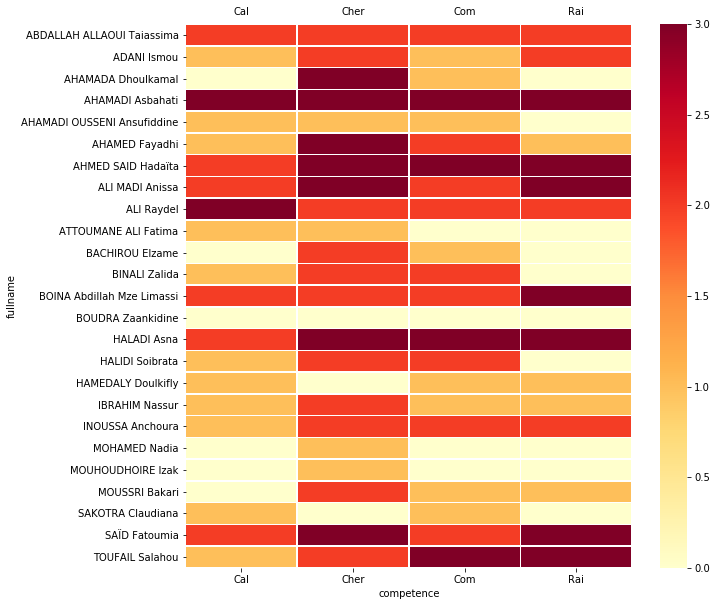

In [32]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(report_comp, cmap='YlOrRd', linewidths=.5)
ax.tick_params(labelbottom='on',labeltop='on')